In [1]:
import json
import numpy as np
import pandas as pd
import pickle
import os

import utils
import sst

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

In [3]:
SST_HOME = os.path.join('data', 'sentiment')

In [4]:
def load_dataset(*src_filenames, labels=None):
    data = []
    for filename in src_filenames:
        with open(filename) as f:
            for line in f:
                d = json.loads(line)
                if labels is None or d['gold_label'] in labels:
                    data.append(d)
    return data

In [5]:
dynasent = load_dataset('data/sentiment/dynasent-v1.1/dynasent-v1.1-round01-yelp-train.jsonl')
dynasent_2 = load_dataset('data/sentiment/dynasent-v1.1/dynasent-v1.1-round01-yelp-train.jsonl')

In [40]:
dyna_df = pd.DataFrame(dynasent)[['sentence', 'gold_label']].dropna()
dyna_df.columns = ['sentence', 'label']
dyna_ = dyna_df[(dyna_df['label']!='mixed') & (dyna_df['sentence'].str.len()<400)]
dyna_

,sentence,label
0,Roto-Rooter is always good when you need someo...,positive
1,It's so worth the price of cox service over he...,positive
2,"I placed my order of ""sticky ribs"" as an appet...",neutral
3,"There is mandatory valet parking, so make sure...",neutral
5,My wife and I couldn't finish it.,neutral
...,...,...
94453,Not to mention they killed Discount Tires prices.,neutral
94454,I have never been cussed out and told someone ...,negative
94456,From September 2010 visit:\n\nDecided to dine ...,neutral
94457,Even fast food restaraunts deserve to be revie...,neutral


In [27]:
dyna2_df = pd.DataFrame(dynasent_2)[['sentence', 'gold_label']].dropna()
dyna2_df.columns = ['sentence', 'label']
dyna2_ = dyna2_df[(dyna2_df['label']!='mixed') & (dyna2_df['sentence'].str.len()<400)]
dyna2_

,sentence,label
0,Roto-Rooter is always good when you need someo...,positive
1,It's so worth the price of cox service over he...,positive
2,"I placed my order of ""sticky ribs"" as an appet...",neutral
3,"There is mandatory valet parking, so make sure...",neutral
5,My wife and I couldn't finish it.,neutral
...,...,...
94453,Not to mention they killed Discount Tires prices.,neutral
94454,I have never been cussed out and told someone ...,negative
94456,From September 2010 visit:\n\nDecided to dine ...,neutral
94457,Even fast food restaraunts deserve to be revie...,neutral


In [8]:
movies = sst.train_reader(SST_HOME, include_subtrees=False)
movies

,example_id,sentence,label,is_subtree
0,00001-00001,The Rock is destined to be the 21st Century 's...,positive,0
71,00002-00001,The gorgeously elaborate continuation of `` Th...,positive,0
144,00003-00001,Singer\/composer Bryan Adams contributes a sle...,positive,0
221,00004-00001,You 'd think by now America would have had eno...,neutral,0
258,00005-00001,Yet the act is still charming here .,positive,0
...,...,...,...,...
318453,08540-00001,A real snooze .,negative,0
318460,08541-00001,No surprises .,negative,0
318465,08542-00001,We 've seen the hippie-turned-yuppie plot befo...,positive,0
318510,08543-00001,Her fans walked out muttering words like `` ho...,negative,0


In [9]:
movies.groupby('label').count()

,example_id,sentence,is_subtree
label,,,
negative,3310,3310,3310
neutral,1624,1624,1624
positive,3610,3610,3610


In [10]:
m_ids = np.concatenate([np.where(movies['label']=='neutral')[0], 
                        np.where(movies['label']=='negative')[0][np.random.choice(3310, replace=False, size=1624)],
                        np.where(movies['label']=='positive')[0][np.random.choice(3610, replace=False, size=1624)]])
movies.iloc[m_ids].groupby('label').count()

,example_id,sentence,is_subtree
label,,,
negative,1624,1624,1624
neutral,1624,1624,1624
positive,1624,1624,1624


In [12]:
movies_dev = sst.dev_reader(SST_HOME)
movies_dev

,example_id,sentence,label,is_subtree
0,08545-00001,It 's a lovely film with lovely performances b...,positive,0
1,08546-00001,"No one goes unindicted here , which is probabl...",neutral,0
2,08547-00001,And if you 're not nearly moved to tears by a ...,positive,0
3,08548-00001,"A warm , funny , engaging film .",positive,0
4,08549-00001,Uses sharp humor and insight into human nature...,positive,0
...,...,...,...,...
1096,09641-00001,it seems to me the film is about the art of ri...,negative,0
1097,09642-00001,It 's just disappointingly superficial -- a mo...,negative,0
1098,09643-00001,The title not only describes its main characte...,negative,0
1099,09644-00001,Sometimes it feels as if it might have been ma...,neutral,0


In [13]:
movies_dev.groupby('label').count()

,example_id,sentence,is_subtree
label,,,
negative,428,428,428
neutral,229,229,229
positive,444,444,444


In [14]:
md_ids = np.concatenate([np.where(movies_dev['label']=='neutral')[0], 
                        np.where(movies_dev['label']=='negative')[0][np.random.choice(428, replace=False, size=229)],
                        np.where(movies_dev['label']=='positive')[0][np.random.choice(444, replace=False, size=229)]])
movies_dev.iloc[md_ids].groupby('label').count()

,example_id,sentence,is_subtree
label,,,
negative,229,229,229
neutral,229,229,229
positive,229,229,229


In [15]:
restaurants = sst.bakeoff_dev_reader(SST_HOME)
restaurants

,example_id,sentence,label,is_subtree
0,1,The wine choices are good though.,positive,0
1,2,Food and service were outstanding!,positive,0
2,3,I would need to be convinced to go there again.,negative,0
3,4,I made the reservation on my iPhone using the ...,neutral,0
4,5,The same level of expertise went into the desc...,neutral,0
...,...,...,...,...
2356,2357,They had added extra tables and it was a bit c...,negative,0
2357,2358,The casino was difficult to navigate.,negative,0
2358,2359,They turned the volume down later.,neutral,0
2359,2360,We find it still best to explore this wonderfu...,positive,0


In [16]:
restaurants.groupby('label').count()

,example_id,sentence,is_subtree
label,,,
negative,565,565,565
neutral,1019,1019,1019
positive,777,777,777


In [17]:
r_ids = np.concatenate([np.where(restaurants['label']=='negative')[0], 
                        np.where(restaurants['label']=='neutral')[0][np.random.choice(1019, replace=False, size=565)],
                        np.where(restaurants['label']=='positive')[0][np.random.choice(777, replace=False, size=565)]])
restaurants.iloc[r_ids].groupby('label').count()

,example_id,sentence,is_subtree
label,,,
negative,565,565,565
neutral,565,565,565
positive,565,565,565


In [18]:
bakeoff_test = sst.bakeoff_test_reader(SST_HOME)
sst_test = sst.test_reader(SST_HOME)
bakeoff_test['dataset'] = 'bakeoff'
sst_test['dataset'] = 'sst3'
df_test = pd.concat((bakeoff_test, sst_test))

In [47]:
n_rtest = 1000
n_dtrain = 5000
n_dtest = 5000

# Sentence Embeddings

In [513]:
from sentence_transformers import SentenceTransformer

In [514]:
model = SentenceTransformer('all-mpnet-base-v2')

In [515]:
# test_emb = model.encode(df_test['sentence'].values)

In [83]:
movies_emb = model.encode(movies['sentence'].values)

In [84]:
movies_dev_emb = model.encode(movies_dev['sentence'].values)

In [85]:
restaurant_emb = model.encode(restaurants['sentence'])

In [145]:
dyna_emb = model.encode(dyna_df['sentence'].values)

KeyboardInterrupt: 

In [22]:
from sklearn.linear_model import LogisticRegression
from torch_rnn_classifier import TorchRNNModel
from torch_deep_neural_classifier import ActivationLayer, TorchDeepNeuralClassifier
from torch_shallow_neural_classifier import TorchShallowNeuralClassifier

In [23]:
import torch.nn as nn

class TorchFunnelClassifier(TorchShallowNeuralClassifier):
    def __init__(self,
           hidden_dims=[50],
            **base_kwargs):
        """
        A dense, feed-forward network with the number of hidden layers
        set by `num_layers`.

        Parameters
        ----------
        num_layers : int
            Number of hidden layers in the network.

        **base_kwargs
            For details, see `torch_model_base.py`.

        Attributes
        ----------
        loss: nn.CrossEntropyLoss(reduction="mean")

        self.params: list
            Extends TorchModelBase.params with names for all of the
            arguments for this class to support tuning of these values
            using `sklearn.model_selection` tools.

        """
        self.num_layers = len(hidden_dims)
        self.hidden_dims = hidden_dims
        super().__init__(**base_kwargs)
        self.loss = nn.CrossEntropyLoss(reduction="mean")
        self.params += ['num_layers']

    def build_graph(self):
        """
        Define the model's computation graph.

        Returns
        -------
        nn.Module

        """
        # Input to hidden:
        self.layers = [
            ActivationLayer(
                self.input_dim, self.hidden_dims[0], self.device, self.hidden_activation)]
        # Hidden to hidden:
        for i in range(self.num_layers-1):
            self.layers += [
                ActivationLayer(
                    self.hidden_dims[i], self.hidden_dims[i+1], self.device, self.hidden_activation)]
        # Hidden to output:
        self.layers.append(
            nn.Linear(self.hidden_dims[-1], self.n_classes_, device=self.device))
        return nn.Sequential(*self.layers)

In [21]:
# pickle.dump([movies_emb, movies_dev_emb, restaurant_emb, dyna_emb], open('all-mpnet-base-v2_embeddings.p', 'bw'))
file = 'data/sentiment/all-mpnet-base-v2_embeddings.p' # 'all-MiniLM-L12-v2_embeddings.p' # 'all-distilroberta-v1_embeddings.p' 
movies_emb, movies_dev_emb, restaurant_emb, dyna_emb, dyna2_emb = pickle.load(open(file, 'br'))   #, dyna_emb, dyna2_emb

In [48]:
restaurant_train_emb, restaurant_dev_emb = restaurant_emb[:-n_rtest], restaurant_emb[-n_rtest:]
train_emb = np.concatenate([movies_emb[m_ids, :], 
                            restaurant_emb[:-n_rtest], 
                            dyna_emb[(dyna_df['label']!='mixed') & (dyna_df['sentence'].str.len()<400)][:n_dtrain, :] 
                            ], axis=0)
labels = np.concatenate([movies['label'].values[m_ids], 
                         restaurants['label'].values[:-n_rtest], 
                         dyna_['label'].values[:n_dtrain]
                        ])
train_emb.shape, labels.shape

((11233, 768), (11233,))

In [49]:
clf =  TorchFunnelClassifier(hidden_dim=[12], max_iter=10000, 
                             eta=1e-3, warm_start=True)

In [50]:
clf.fit(train_emb, labels)

Stopping after epoch 2506. Training loss did not improve more than tol=1e-05. Final error is 0.0011282528430456296.

TorchFunnelClassifier(
	batch_size=1028,
	max_iter=10000,
	eta=0.001,
	optimizer_class=<class 'torch.optim.adam.Adam'>,
	l2_strength=0,
	gradient_accumulation_steps=1,
	max_grad_norm=None,
	validation_fraction=0.1,
	early_stopping=False,
	n_iter_no_change=10,
	warm_start=True,
	tol=1e-05,
	hidden_dim=[12],
	hidden_activation=Tanh(),
	num_layers=1)

In [51]:
r_predict = clf.predict(restaurant_emb[-n_rtest:])
d_predict = clf.predict(dyna_emb[(dyna_df['label']!='mixed') & (dyna_df['sentence'].str.len()<400)][-n_dtest:])
t_predict = clf.predict(train_emb)
m_d_predict = clf.predict(movies_dev_emb)

In [518]:
# df_test['prediction'] = clf.predict(test_emb)
# df_test.to_csv('cs224u-sentiment-bakeoff-entry.csv', index=None)

In [52]:
f1s = [f1_score(restaurants['label'][-n_rtest:], r_predict, average='macro'), 
       f1_score(movies_dev['label'], m_d_predict, average='macro')]
f1s, np.mean(f1s), f1_score(labels, t_predict, average='macro'), f1_score(dyna_['label'][-n_dtest:], d_predict, average='macro')

/var/folders/xb/ksf3f8q50ws41h95k4th7z4w0000gp/T/ipykernel_55964/3777367176.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  f1s, np.mean(f1s), f1_score(labels, t_predict, average='macro'), f1_score(dyna_['label'][-n_dtest:], d_predict, average='macro')


([0.6695434824320284, 0.5925900270612249],
 0.6310667547466267,
 1.0,
 0.5877310853821287)

In [33]:
cm = confusion_matrix(restaurants['label'][-n_rtest:], r_predict)

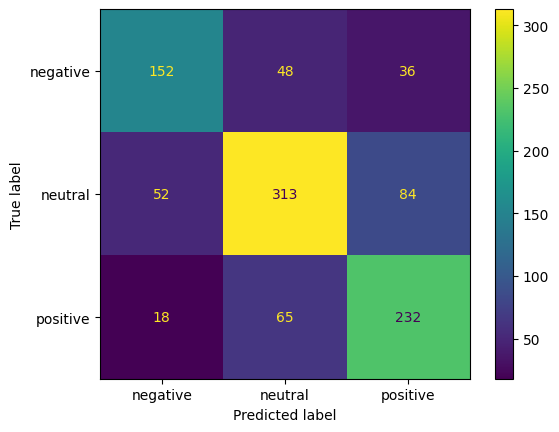

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

# RNN with Glove embeddings

In [12]:
from torch_rnn_classifier import TorchRNNClassifier

In [13]:
embeddings_dict = {}
with open("data/glove.840B.300d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = ''.join(values[:-300])
        vector = np.asarray(values[-300:], "float32")
        embeddings_dict[word] = vector

In [14]:
glove_df = pd.DataFrame(embeddings_dict).transpose()
glove_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
",",-0.082752,0.672040,-0.14987,-0.064983,0.056491,0.402280,0.002775,-0.331100,-0.306910,2.0817,...,-0.14331,0.018267,-0.18643,0.207090,-0.355980,0.053380,-0.050821,-0.191800,-0.378460,-0.06589
.,0.012001,0.207510,-0.12578,-0.593250,0.125250,0.159750,0.137480,-0.331570,-0.136940,1.7893,...,0.16165,-0.066737,-0.29556,0.022612,-0.281350,0.063500,0.140190,0.138710,-0.360490,-0.03500
the,0.272040,-0.062030,-0.18840,0.023225,-0.018158,0.006719,-0.138770,0.177080,0.177090,2.5882,...,-0.42810,0.168990,0.22511,-0.285570,-0.102800,-0.018168,0.114070,0.130150,-0.183170,0.13230
and,-0.185670,0.066008,-0.25209,-0.117250,0.265130,0.064908,0.122910,-0.093979,0.024321,2.4926,...,-0.59396,-0.097729,0.20072,0.170550,-0.004736,-0.039709,0.324980,-0.023452,0.123020,0.33120
to,0.319240,0.063160,-0.27858,0.261200,0.079248,-0.214620,-0.104950,0.154950,-0.033530,2.4834,...,-0.12977,0.371300,0.18888,-0.004274,-0.106450,-0.258100,-0.044629,0.082745,0.097801,0.25045


In [18]:
glove_df.to_hdf('glove.840B.300d.hdf', key='emb')

In [63]:
glove_ = glove_df.append(pd.Series(glove_df.loc['<unk>'], name='$UNK'))
glove_

/var/folders/xb/ksf3f8q50ws41h95k4th7z4w0000gp/T/ipykernel_43298/706370959.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glove_ = glove_df.append(pd.Series(glove_df.loc['<unk>'], name='$UNK'))


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
",",-0.082752,0.672040,-0.14987,-0.064983,0.056491,0.402280,0.002775,-0.331100,-0.306910,2.0817,...,-0.14331,0.018267,-0.18643,0.207090,-0.355980,0.053380,-0.050821,-0.191800,-0.378460,-0.06589
.,0.012001,0.207510,-0.12578,-0.593250,0.125250,0.159750,0.137480,-0.331570,-0.136940,1.7893,...,0.16165,-0.066737,-0.29556,0.022612,-0.281350,0.063500,0.140190,0.138710,-0.360490,-0.03500
the,0.272040,-0.062030,-0.18840,0.023225,-0.018158,0.006719,-0.138770,0.177080,0.177090,2.5882,...,-0.42810,0.168990,0.22511,-0.285570,-0.102800,-0.018168,0.114070,0.130150,-0.183170,0.13230
and,-0.185670,0.066008,-0.25209,-0.117250,0.265130,0.064908,0.122910,-0.093979,0.024321,2.4926,...,-0.59396,-0.097729,0.20072,0.170550,-0.004736,-0.039709,0.324980,-0.023452,0.123020,0.33120
to,0.319240,0.063160,-0.27858,0.261200,0.079248,-0.214620,-0.104950,0.154950,-0.033530,2.4834,...,-0.12977,0.371300,0.18888,-0.004274,-0.106450,-0.258100,-0.044629,0.082745,0.097801,0.25045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
z/28,0.734400,-0.336410,0.26918,0.418430,-0.189000,0.280200,0.238750,-0.128790,-0.157970,-1.2841,...,-0.31101,-0.989550,0.27627,0.252650,0.479310,-0.484320,-1.005500,0.637180,-0.139140,-0.16472
zipout,0.212150,-0.994560,1.17820,2.072100,-0.442710,0.587300,0.261280,-0.425540,0.030910,-1.6743,...,-0.19946,-0.198480,1.09150,-0.351070,-1.047200,-0.413820,-0.211390,0.934270,-0.932860,-0.51479
zulchzulu,-0.079690,-0.229050,0.80366,-0.788650,-0.405670,-0.157160,-0.423020,0.640810,-0.132150,-1.4109,...,0.64657,-0.415910,0.14240,-0.051749,0.389250,-0.205220,0.268780,-0.083561,0.485320,-0.73130
<unk>,-0.079690,-0.229050,0.80366,-0.788650,-0.405670,-0.157160,-0.423020,0.640810,-0.132150,-1.4109,...,0.64657,-0.415910,0.14240,-0.051749,0.389250,-0.205220,0.268780,-0.083561,0.485320,-0.73130


In [138]:
d = sst.build_dataset([movies, restaurants], rnn_phi, vectorize=False)
mr_vocab = utils.get_vocab(d['X'], mincount=2)
len(mr_vocab)

8887

In [140]:
glove_.loc[mr_vocab]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
,0.597590,-0.640120,0.32797,-0.402370,-0.966060,0.059478,-0.215760,0.162160,-0.327970,-1.63230,...,0.259680,-0.331000,-0.600790,-0.491820,0.743190,-0.229990,-0.107790,-0.450780,-0.344750,-0.56342
"""",-0.075242,0.573370,-0.31908,-0.184840,0.888670,-0.273810,0.077588,0.139050,-0.477460,1.44420,...,-0.035604,-0.022669,0.425310,0.063414,0.362130,-0.212800,-0.226150,0.328000,-0.109340,-0.37948
#,-0.444670,0.695360,0.42748,0.219060,0.117570,-0.213110,0.580860,0.073145,-0.085245,0.36655,...,0.281160,0.357600,-0.056253,0.219490,0.351250,-0.413770,-0.278680,-0.079391,-0.527170,-0.12413
$,-0.607120,0.425440,0.51040,-0.287500,0.514750,0.082824,-0.415860,-0.343850,0.489610,0.70518,...,-0.302490,-0.025315,0.471890,-0.226380,-0.974970,0.061226,-0.388950,-0.185880,0.025965,-0.48231
$UNK,-0.079690,-0.229050,0.80366,-0.788650,-0.405670,-0.157160,-0.423020,0.640810,-0.132150,-1.41090,...,0.646570,-0.415910,0.142400,-0.051749,0.389250,-0.205220,0.268780,-0.083561,0.485320,-0.73130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zings,-0.096697,-0.070718,0.10291,-0.438350,-0.008710,0.322620,0.421340,-0.069360,0.701790,-0.97765,...,0.267520,-0.160580,-0.214600,-0.342480,0.098743,-0.258170,-0.066133,-0.096388,-0.178550,0.16520
zippy,-0.119490,0.360940,0.01845,-0.013415,0.131960,0.572500,0.131120,-0.258200,0.240580,-0.86782,...,-0.249840,0.354430,0.542730,-0.153530,0.424870,-0.241470,0.166220,-0.687120,-0.661260,-0.21029
zombie,-0.148990,-0.872880,-0.22808,-0.508730,-0.003949,-0.188800,-0.356310,-0.148940,0.191140,1.18480,...,-0.433680,-0.093496,-0.165160,0.552950,-0.138570,-0.158480,-0.589230,-0.066741,-0.383160,0.32494
zone,0.270730,-0.087394,-0.36834,-0.000766,1.144800,0.020719,0.553720,-0.094013,-0.552430,2.01740,...,0.506370,0.652430,0.301000,-0.141300,0.378510,0.152990,-0.393860,0.036836,-0.217180,-0.34061


In [34]:
import re

In [142]:
def rnn_phi(text):
    drop = ['s&w', 'w/', '"by', '$10', '$100', '$200', '$25', '$30', '$300', '$4', '$40', '$5', '$500', '$70', '$9', '20%', 'achronological', 'ahola', 'alagna', 'apted', 'assayas', 'attal', 'audiard', 'auteil', 'auteuil', 'berling', 'bielinsky', 'birot', 'bogdanovich', 'burstein', 'buñuel', 'byler', 'béart', 'c.h.o.', 'cacoyannis', 'cantet', 'chabrol', 'chaiken', 'chouraqui', 'clayburgh', 'cletis', 'clockstoppers', 'cockettes', 'collinwood', 'cuaron', 'decasia', 'egoyan', 'famuyiwa', 'feardotcom', 'fessenden', 'fresnadillo', 'gaghan', 'gayton', 'gheorghiu', 'goldbacher', 'hanussen', 'hashiguchi', 'hickenlooper', 'hitchcockian', 'holofcener', 'hudlin', 'idemoto', 'imamura', 'intacto', 'iwai', 'jacquot', 'jaglom', 'janklowicz', 'jarecki', 'juwanna', 'kieslowski', 'koepp', 'kosashvili', 'kosminsky', 'koury', 'kouyate', 'kurys', 'labute', 'lapaglia', 'maggiano', 'majidi', 'mattei', 'meyjes', 'morvern', 'muccino', 'musset', 'nachtwey', 'naipaul', 'nebrida', 'nettelbeck', 'nickleby', 'nijinsky', 'nohe', 'oedekerk', 'ozpetek', 'payami', 'pellington', 'peploe', 'rohmer', 'romanek', 'rubbo', 'ruggero', 'runteldat', 'schepisi', 'scherfig', 'schnitzler', 'seldahl', 'serrault', 'shadyac', 'shainberg', 'silberling', 'solondz', 'sonnenfeld', 'testud', 'twohy', 'tykwer', 'uncinematic', 'waydowntown', 'wertmuller', 'windtalkers', 'wollter', 'zhuangzhuang']
    seq = re.split(', |_|-| |\\\\/|\'|!|\.|\)|\(|:|\?|;', text.lower())
    seq = [s for s in seq if s not in drop]
    return seq

In [175]:
def fit_rnn_classifier(X, y):
    # sst_glove_vocab = utils.get_vocab(X, mincount=2)
    mod = TorchRNNClassifier(
        [],
        early_stopping=True,
        use_embedding=False)
    mod.fit(X, y)
    return mod

In [188]:
rnn_experiment = sst.experiment(
    [movies, restaurants.iloc[:-n_rtest]],
    rnn_phi,
    fit_rnn_classifier,
    vectorize=False,  # For deep learning, use `vectorize=False`.
    assess_dataframes=[movies_dev, restaurants.iloc[-n_rtest]])

/Users/lara.thompson/code/cs224u/torch_rnn_classifier.py:379: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  new_X = [torch.FloatTensor(ex) for ex in X]
Stopping after epoch 14. Validation score did not improve by tol=1e-05 for more than 10 epochs. Final error is 0.6584565043449402/Users/lara.thompson/.local/share/virtualenvs/lara.thompson-C83ZgnRu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lara.thompson/.local/share/virtualenvs/lara.thompson-C83ZgnRu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:133

              precision    recall  f1-score   support

    negative      0.000     0.000     0.000         4
     neutral      0.000     0.000     0.000        13
    positive      0.837     0.988     0.906        83

    accuracy                          0.820       100
   macro avg      0.279     0.329     0.302       100
weighted avg      0.694     0.820     0.752       100



# RNN with Bert

## get bert embeddings

In [151]:
from transformers import BertModel, BertTokenizer

In [155]:
import vsm

In [153]:
bert_weights_name = 'bert-base-cased'
bert_tokenizer = BertTokenizer.from_pretrained(bert_weights_name)
bert_model = BertModel.from_pretrained(bert_weights_name)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [256]:
def bert_phi(text):
    subtok_ids = vsm.hf_encode(text, bert_tokenizer)
    torch_array = vsm.hf_represent(subtok_ids, bert_model, layer=-1)
    return [torch_array[0, i, :].numpy() for i in range(torch_array.shape[1])]

In [253]:
def build_Xy(df, phi):
    X = df['sentence'].apply(phi).tolist()
    y = df['label'].values
    return {'X': X, 'y': y}

In [ ]:
Xr_last, yr_last = build_Xy(restaurants, bert_phi) 

In [257]:
Xm_last, ym_last = build_Xy(movies, bert_phi) 
Xmd_last, ymd_last = build_Xy(movies_dev, bert_phi) 

In [192]:
train = sst.build_dataset(
    movies,
    bert_phi,
    vectorizer=None,
    vectorize=False)

In [195]:
mov_bert = train

In [196]:
rest_bert = sst.build_dataset(
    restaurants,
    bert_phi,
    vectorizer=None,
    vectorize=False)

In [197]:
movd_bert = sst.build_dataset(
    movies_dev,
    bert_phi,
    vectorizer=None,
    vectorize=False)

In [198]:
movt_bert = sst.build_dataset(
    movies_test,
    bert_phi,
    vectorizer=None,
    vectorize=False)

## or just load them

In [287]:
# mov_bert, movd_bert, rest_bert = pickle.load(open('bert_lastlayer.p', 'br'))
dyna2_bert = pickle.load(open('bert_lastlayer_dyna2.p', 'br')) #dyna_bert, 

In [293]:
type(dyna2_bert['y'])

numpy.ndarray

## Train Model

In [265]:
X_train = [se for i, se in enumerate(mov_bert['X']) if i in m_ids] + [se for i, se in enumerate(rest_bert['X']) if i in r_ids[:-1000]] + [
           se for i, se in enumerate(movd_bert['X']) if i in md_ids[:-500]]
y_train = [l for i, l in enumerate(mov_bert['y']) if i in m_ids] + [l for i, l in enumerate(rest_bert['y']) if i in r_ids[:-1000]] + [
           l for i, l in enumerate(movd_bert['y']) if i in md_ids[:-500]]

In [266]:
X_test = [se for i, se in enumerate(rest_bert['X']) if i not in r_ids[:-1000]] + [
    se for i, se in enumerate(movd_bert['X']) if i not in md_ids[:-500]]
y_test = [l for i, l in enumerate(rest_bert['y']) if i not in r_ids[:-1000]] + [
    l for i, l in enumerate(movd_bert['y']) if i not in md_ids[:-500]]

In [267]:
len(X_train)

5754

In [294]:
X_train = mov_bert['X'] + rest_bert['X'][:-n_rtest] + dyna2_bert['X'][:5000]
y_train =  mov_bert['y'] + rest_bert['y'][:-n_rtest] + list(dyna2_bert['y'][:5000])

X_test =  movd_bert['X'] + rest_bert['X'][-n_rtest:] + dyna2_bert['X'][5000:6000]
y_test = movd_bert['y'] + rest_bert['y'][-n_rtest:] + list(dyna2_bert['y'][5000:6000])

In [295]:
mod = TorchRNNClassifier(
    [],
    early_stopping=True, warm_start=True,
    hidden_dim=200, bidirectional=True,
    use_embedding=False, 
)
mod.fit(X_train, y_train)

Stopping after epoch 32. Validation score did not improve by tol=1e-05 for more than 10 epochs. Final error is 0.005834389041410759

TorchRNNClassifier(
	batch_size=1028,
	max_iter=1000,
	eta=0.001,
	optimizer_class=<class 'torch.optim.adam.Adam'>,
	l2_strength=0,
	gradient_accumulation_steps=1,
	max_grad_norm=None,
	validation_fraction=0.1,
	early_stopping=True,
	n_iter_no_change=10,
	warm_start=True,
	tol=1e-05,
	hidden_dim=200,
	embed_dim=768,
	embedding=None,
	use_embedding=False,
	rnn_cell_class=<class 'torch.nn.modules.rnn.LSTM'>,
	bidirectional=True,
	freeze_embedding=False,
	classifier_activation=ReLU())

In [296]:
predict_t = mod.predict(X_test)
f1_score(y_test, predict_t, average='macro')

0.521338319448645

In [297]:
f1s = [f1_score(y, mod.predict(X), average='macro') for y, X in [(movd_bert['y'], movd_bert['X']), 
                                                                 (rest_bert['y'][-n_rtest:], rest_bert['X'][-n_rtest:])]]
print(f1s, np.mean(f1s))

[0.5497671188015758, 0.5898036234365646] 0.5697853711190701


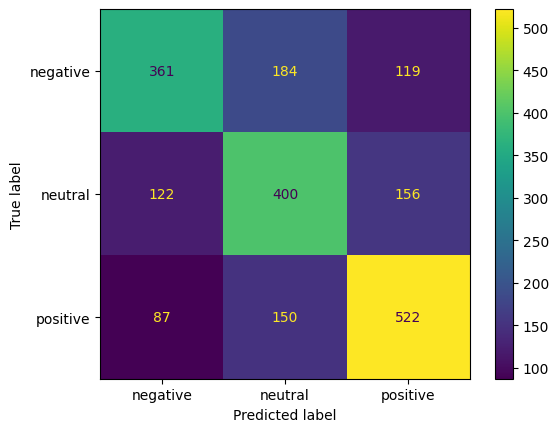

In [286]:
cm = confusion_matrix(y_test, predict_t)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mod.classes_)
disp.plot()